Thats how it goes like

<font color = 'green'>
    
Step 1: Define Problem.
    
Step 2: Prepare Data.
    
Step 3: Evaluate Models.
    
Step 4: Finalize Model.

---
## Step 2
    
- Data Cleaning: Identifying and correcting mistakes or errors in the data.
- Feature Selection: Identifying those input variables that are most relevant to the task.
- Data Transforms: Changing the scale or distribution of variables.
- Feature Engineering: Deriving new variables from available data.
- Dimensionality Reduction: Creating compact projections of the data.

---



# TITLE
![d](diabetes.jpg)

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
pima = pd.read_csv('pima-indians-diabetes.csv', header=None)
pima.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
pima.iloc[:, -1].value_counts()

0    500
1    268
Name: 8, dtype: int64

- We are definitely into an Imbalanced dataset

## Data Cleaning

#### Check for Null and Invalid Values 

In [4]:
pima.isnull().sum().any()

False

In [5]:
for col in pima.columns:
    print(pima[col].value_counts(dropna=False).sort_index())

0     111
1     135
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
12      9
13     10
14      2
15      1
17      1
Name: 0, dtype: int64
0      5
44     1
56     1
57     2
61     1
      ..
195    2
196    3
197    4
198    1
199    1
Name: 1, Length: 136, dtype: int64
0      35
24      1
30      2
38      1
40      1
44      4
46      2
48      5
50     13
52     11
54     11
55      2
56     12
58     21
60     37
61      1
62     34
64     43
65      7
66     30
68     45
70     57
72     44
74     52
75      8
76     39
78     45
80     40
82     30
84     23
85      6
86     21
88     25
90     22
92      8
94      6
95      1
96      4
98      3
100     3
102     1
104     2
106     3
108     2
110     3
114     1
122     1
Name: 2, dtype: int64
0     227
7       2
8       2
10      5
11      6
12      7
13     11
14      6
15     14
16      6
17     14
18     20
19     18
20     13
21     10
22     16
23     22
24     12
25

- Utilizing the domain knowledge, We found that the following columns have an invalid zero minimum value:
    - Plasma glucose concentration
    - Diastolic blood pressur
    - Triceps skinfold thickness
    - 2-Hour serum insulin
    - Body mass index

Having identified some of the missing values, lets label them correctly with np.nan

In [6]:
# Cols with invalid zeros
zero_as_nan = pima.iloc[:,[1, 2, 3, 4, 5]]

# Replace the cols
zero_as_nan = zero_as_nan.replace(0, np.nan)

In [7]:
# Replace the chunk from df object
pima.iloc[:,[1, 2, 3, 4, 5]] = zero_as_nan

In [8]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       763 non-null    float64
 2   2       733 non-null    float64
 3   3       541 non-null    float64
 4   4       394 non-null    float64
 5   5       757 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


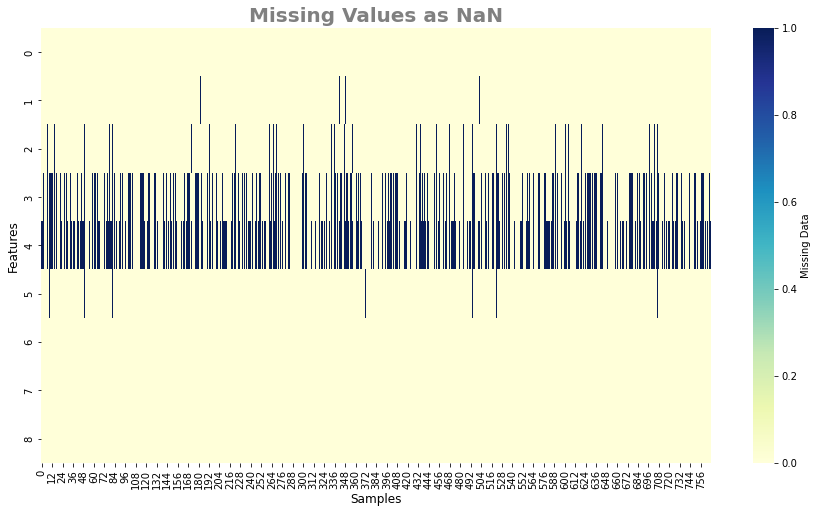

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(pima.isnull().transpose(),
            cmap='YlGnBu',
            cbar_kws={'label': 'Missing Data'})
plt.xlabel('Samples', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Missing Values as NaN', fontsize=20, weight='bold',c='grey')
plt.show()

Lets consider the easiest solution, drop all samples with nans and compute the accuracy

In [10]:
print('Shape of dataset before dropping all the samples with NaN:', pima.shape)

pima_zeronull = pima.dropna()
print('Shape of dataset after dropping all the samples with NaNs:', pima_zeronull.shape)

Shape of dataset before dropping all the samples with NaN: (768, 9)
Shape of dataset after dropping all the samples with NaNs: (392, 9)


- There is clearly a heavy loss of data. More than half of the samples wiped off

In [11]:
# import libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [12]:
data = pima_zeronull.values
X = data[:,:-1]
y = data[:, -1]
# Instantiate the Algo
lda = LinearDiscriminantAnalysis()
# Define the evaluation procedure
cv = KFold(n_splits=10, shuffle=True, random_state=1)
# Evaluate the model
result = cross_val_score(lda, X, y, cv=cv, scoring='accuracy')
# print the results
print(np.mean(result))

0.7832051282051282


In [13]:
np.unique(y, return_counts=True)

(array([0., 1.]), array([262, 130], dtype=int64))

- This clarfies that the reduction in dataset for the null values has not helped reduce the class imbalance!

<font color = 'red'> From this point, no further procedure in the book on this dataset 